# Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

# Index:

- <a href='#1'>1. Data</a>
    - <a href='#1.1'>1.1. Data overview</a>
    - <a href='#1.2'>1.2. Profile Report of data for better understanding</a>
- <a href='#2'>2. Data Manipulation</a>
- <a href='#3'>3. Statistical Tests</a>
    - <a href='#3.1'>3.1. Distribution check on Numerical Features</a>
    - <a href='#3.2'>3.2. Dependancy check across Features</a>
    - <a href='#3.3'>3.3.Performing an Independent t-test for Income and Loan</a>
    - <a href='#3.4'>3.4.Performing ANOVA for Family and Loan</a>
- <a href='#4'>4. Exploratory Data Analysis</a>    
    - <a href='#4.1'>4.1. Personal loans distribution in data</a>
    - <a href='#4.2.'>4.2. Age and Income in Personal Loan</a>
    - <a href='#4.3.'>4.3. Age and Experience in Personal Loan</a>
    - <a href='#4.4.'>4.4. Family and Income in Personal Loan</a>
    - <a href='#4.5.'>4.5. Family and Mortgage in Personal Loan</a>
    - <a href='#4.6.'>4.6. Income and Mortgage in Personal Loan</a>
    - <a href='#4.7.'>4.7. CCAvg and Family in Personal Loan</a>
    - <a href='#4.8.'>4.8. Distribution of Categorical Variables across Loan and Non Loan Cusotmers</a>
	- <a href='#4.9.'>4.9. Distribution of Numerical Features across Loan and Non Loan Cusotmers</a>
- <a href='#5'>5. Data Preprocessing</a>
	- <a href='#5.1.'>5.1. Data Split into Test and Train</a>
	- <a href='#5.2.'>5.2. Normalise the data</a>
- <a href='#6.'>6. Model Building</a>
	- <a href='#6.0.'>6.0. Functions to be used across all models</a>
	- <a href='#6.1.'>6.1. KNN Classifier</a>
		- <a href='#6.1.1.'>6.1.1.Finding best K value</a>
		- <a href='#66.1.2.'>6.1.2. KNN Model</a>
	- <a href='#6.2.'>6.2. LogisticRegression Model</a>
	- <a href='#6.3.'>6.3. GaussianNB Model</a>
	- <a href='#6.4.'>6.4. DecisionTreeClassifier Model</a>
	- <a href='#6.5.'>6.5. RadiusNeighborsClassifier Model</a>
- <a href='#7.'>7. Model Performances </a>
	- <a href='#7.1'>7.1. Model Performance Metrics</a>
	- <a href='#7.2'>7.2. Compare Model Metrics</a>
- <a href='#8.'>8. Ensemble Methods </a>
	- <a href='#8.1'>8.1. Bagging Classifier</a>
		- <a href='#8.1.1.'>8.1.1. KNeighborsClassifier</a>
		- <a href='#8.1.12.'>8.1.2. LogisticRegression</a>	
		- <a href='#8.1.3.'>8.1.3. GaussianNB</a>
		- <a href='#8.1.4.'>8.1.4. DecisionTreeClassifier</a>
	- <a href='#8.2'>8.2. Boosting Methods</a>
		- <a href='#8.2.1.'>8.2.1. AdaBoostClassifier</a>
			- <a href='#8.2.1.1.'>8.2.1.1. LogisticRegression</a>
			- <a href='#8.2.1.2.'>8.2.1.2. GaussianNB</a>
			- <a href='#8.2.1.3.'>8.2.1.3. DecisionTreeClassifier</a>
			- <a href='#8.2.1.4.'>8.2.1.4. default AdaBoostClassifier</a>
	- <a href='#8.2.2.'>8.2.2. GradientBoostingClassifier</a>
	- <a href='#8.3'>8.3. VotingClassifier</a>
	- <a href='#8.4'>8.4. RandomForestClassifier</a>
	- <a href='#8.5'>8.5. lightgbm</a>
	- <a href='#8.6'>8.6. xgboost</a>
- <a href='#9.'>9. Ensemble Performances </a>
	- <a href='#9.1'>9.1. Ensemble Performance Metrics</a>
	- <a href='#9.2'>9.2. Compare Ensemble Metrics</a>

In [1]:
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
# import all libraries

import pandas as pd #basic
import numpy as np #basic
import pandas_profiling as pp #EDA

from scipy.stats import shapiro #Stats
from scipy.stats import pearsonr #Stats
import scipy.stats as stats #Stats

import plotly.express as px #visualization
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization
import plotly.figure_factory as ff#visualization

from sklearn.model_selection import train_test_split #Split data
from sklearn import preprocessing #manipulate data
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score,roc_auc_score



# <a id='1'>1.Data</a>

In [3]:
#load the dataset 
loans = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

## <a id='1.1'>1.1. Data Overview</a>

In [4]:
print ("Rows     : " ,loans.shape[0])
print ("Columns  : " ,loans.shape[1])
print ("\nFeatures : \n" ,loans.columns.tolist())
print ("\nMissing values :  ", loans.isnull().sum().values.sum())
print ("\nUnique values :  \n",loans.nunique())

Rows     :  5000
Columns  :  14

Features : 
 ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

Missing values :   0

Unique values :  
 ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


In [5]:
loans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
# Get the target column distribution. Your comments
loans['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

## Inferences:
1. The distribution of target column is not uniform. 
   The dataset is imbalanced and we cannot rely only on accuracy score of models to evaluate performance.
   We will use f1 score to measure different models performance
2. Experience Column has -ve values and to be corrected
3. Highly skewed Income and Mortgage columns need to check for outliers
4. No Missing values in any columns

## <a id='1.2'>1.2. Profile Report of data for better understanding</a>

In [7]:
df_new=loans.copy()
pp.ProfileReport(df_new)

# <a id='2'>2. Data Manipulation</a>

In [8]:
# Experience column has -ve values as seen from decribe output
# total rows with this issue

print (loans[loans['Experience'] < 0]['Experience'].value_counts().sum())

# we have 52 record thats less than one percent, so we will take abstract values

loans['Experience'] = loans['Experience'].apply(abs)

# New dataframe to get Vizulizations from data

loans_viz = loans.copy()

# replace values

loans_viz['Securities Account'] = loans_viz['Securities Account'].replace({1: 'Yes', 0: 'No'})
loans_viz['CD Account'] = loans_viz['CD Account'].replace({1: 'Yes',0: 'No'})
loans_viz['Online'] = loans_viz['Online'].replace({1: 'Yes', 0: 'No'})
loans_viz['CreditCard'] = loans_viz['CreditCard'].replace({1: 'Yes',0: 'No'})

# Make Mortgage a Yes or No field just for vizulization purposes

def mort_lab(loans_viz):
    if loans_viz['Mortgage'] > 0:
        return 'Yes'
    elif loans_viz['Mortgage'] == 0:
        return 'No'

loans_viz['Mortgage'] = loans_viz.apply(lambda loans_viz:mort_lab(loans_viz), axis=1)

# Separating customers who took loans vs who didnt

loan = loans_viz[loans_viz['Personal Loan'] == 1]
not_loan = loans_viz[loans_viz['Personal Loan'] == 0]

# Separating catagorical and numerical columns

Id_col = ['ID']
target_col = ['Personal Loan']
exclude = ['ZIP Code']# as zip code is not having any value in personal loan predictions
cat_cols = loans_viz.nunique()[loans_viz.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col + exclude]
num_cols = [x for x in loans_viz.columns if x not in cat_cols
            + target_col + Id_col + exclude]


52


# <a id='3'>3. Statistical Tests</a>

##  <a id='3.1'>3.1. Distribution check on Numerical Features</a>

In [9]:
#check distirbution
def check_dist(col_name):
    stat, p = shapiro(loans[col_name])
#     print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Distribution of {} column is Probably Normal'.format(col_name))
    else:
        print('Distribution of {} column is Probably Not Normal'.format(col_name))
for col in num_cols:
    check_dist(col)        

Distribution of Age column is Probably Not Normal
Distribution of Experience column is Probably Not Normal
Distribution of Income column is Probably Not Normal
Distribution of CCAvg column is Probably Not Normal


## Inference
None of the numerical columns are Normally distributed and for models to perform better we have to perform Normalization

##  <a id='3.2'>3.2. Dependancy check across Features</a>

In [10]:
#check correlation
def check_dependancy(col1,col2):
    stat, p = pearsonr(loans[col1], loans[col2])
    if p > 0.05:
        print('{} and {} are Probably independent<----'.format(col1,col2))
    else:
        print('{} and {} are Probably dependent'.format(col1,col2))
check_dependancy('Experience','Income')
check_dependancy('Age','Income')
check_dependancy('Education','Income')
check_dependancy('Family','Income')
check_dependancy('Family','Mortgage')
check_dependancy('Family','Personal Loan')
check_dependancy('CCAvg','Personal Loan')
check_dependancy('ZIP Code','Personal Loan')
check_dependancy('Income','Personal Loan')
check_dependancy('Age','Personal Loan')

Experience and Income are Probably dependent
Age and Income are Probably dependent
Education and Income are Probably dependent
Family and Income are Probably dependent
Family and Mortgage are Probably independent<----
Family and Personal Loan are Probably dependent
CCAvg and Personal Loan are Probably dependent
ZIP Code and Personal Loan are Probably independent<----
Income and Personal Loan are Probably dependent
Age and Personal Loan are Probably independent<----


## Inferences
1. ZIP_Code column is not important for our modelling and can be removed from features
2. Family size is not impacting mortgage
3. Age is not contributing to Personal Loan
4. all others combinations we saw are related and we can use this info for modelling purposes

##  <a id='3.3'>3.3.Performing an Independent t-test for Income and Loan</a>

In [11]:
# T-test to check dependency of smoking on charges
Ho = "Income of Loan Customer and non-Loan Customer are same"   # Stating the Null Hypothesis
Ha = "Income of Loan Customer and non-Loan Customer are not same"   # Stating the Alternate Hypothesis

x = np.array(loans[loans['Personal Loan']==1].Income)  # Selecting income corresponding to  Loan Customer as an array
y = np.array(loans[loans['Personal Loan']==0].Income) # Selecting income corresponding to non- Loan Customer as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Income of Loan Customer and non-Loan Customer are not same as the p_value (0.0) < 0.05


##  <a id='3.4'>3.4.Performing ANOVA for Family and Loan</a>

In [12]:
Ho = "No. of family has no effect on loan"   # Stating the Null Hypothesis
Ha = "No. of family has an effect on loan"   # Stating the Alternate Hypothesis


one = loans[loans.Family == 1]['Personal Loan']
two = loans[loans.Family == 2]['Personal Loan']
three = loans[loans.Family == 3]['Personal Loan']
four = loans[loans.Family == 4]['Personal Loan']


f_stat, p_value = stats.f_oneway(one,two,three,four)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of family has an effect on loan as the p_value (0.0) < 0.05


# <a id='4'>4. Exploratory Data Analysis</a>

## <a id='4.1'>4.1. Personal loans distribution in data</a>

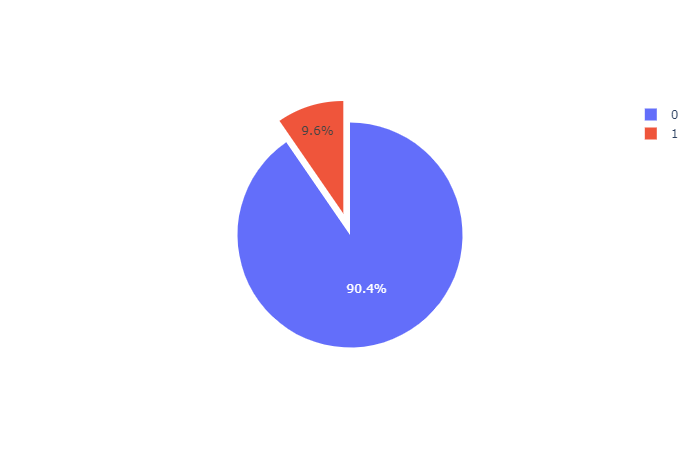

In [13]:
names=loans_viz['Personal Loan'].value_counts().keys()
values=loans_viz['Personal Loan'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=names, values=values, pull=[0,  0.2])])
fig.show()

## <a id='4.2.'>4.2. Age and Income in Personal Loan</a>

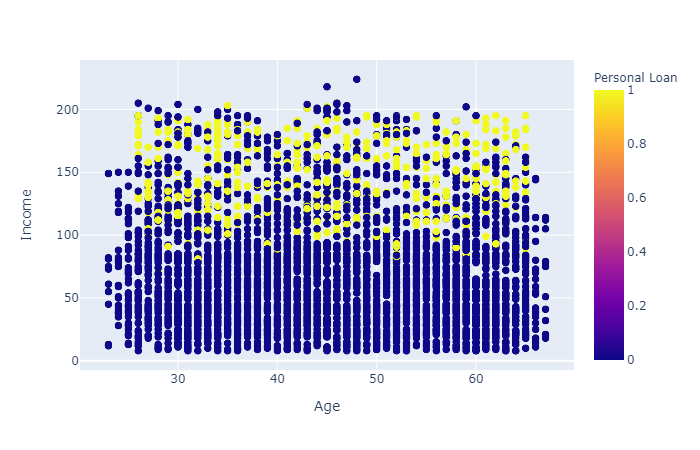

In [14]:
px.scatter(data_frame=loans_viz,x='Age',y='Income',color='Personal Loan')

## Inference:
there are many cases where if income is above 100, then personal loans are taken, There could be 2 reasons
1. people with lesser incomes are not preffering loans 

or
2. people withe lesser incomes were not sanctioned loans

So for marketing campaign, it would be better to target people with higher incomes are there will be more sucess rate

## <a id='4.3.'>4.3. Age and Experience in Personal Loan</a>

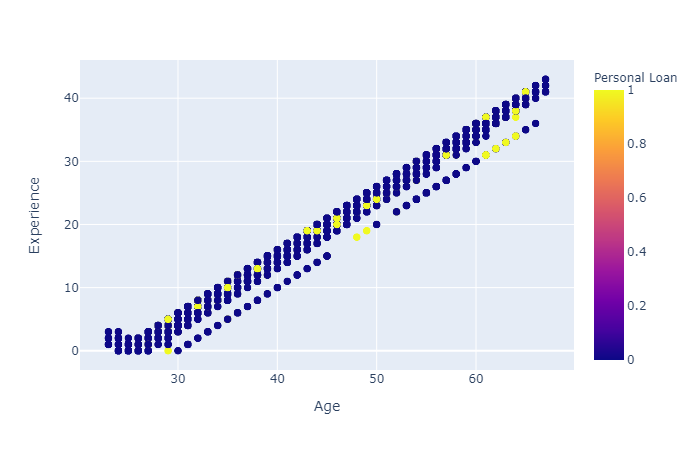

In [15]:
px.scatter(data_frame=loans_viz,x='Age',y='Experience',color='Personal Loan')

## Inference
Age and Experience are alomost linear and they dont give much info on personal loans

## <a id='4.4.'>4.4. Family and Income in Personal Loan</a>

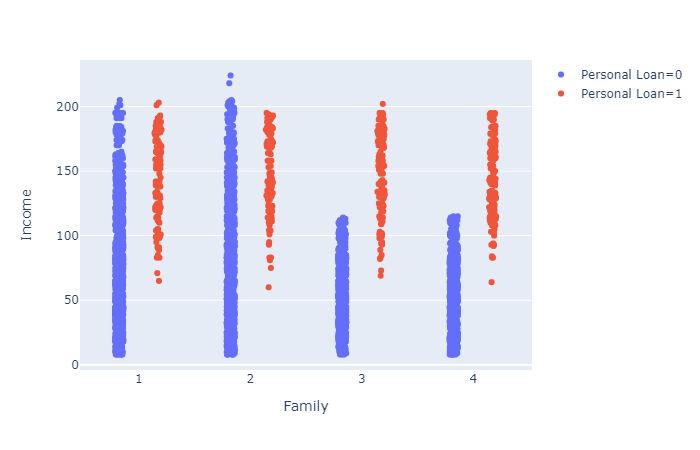

In [16]:
px.strip(data_frame=loans_viz,x='Family',y='Income',color='Personal Loan')

## Inference:
its very evident that person with a family greater than 2 and income greater than 100 are very much likey to be taking a personal loan and they can be targeted for campaign

## <a id='4.5.'>4.5. Family and Mortgage in Personal Loan</a>

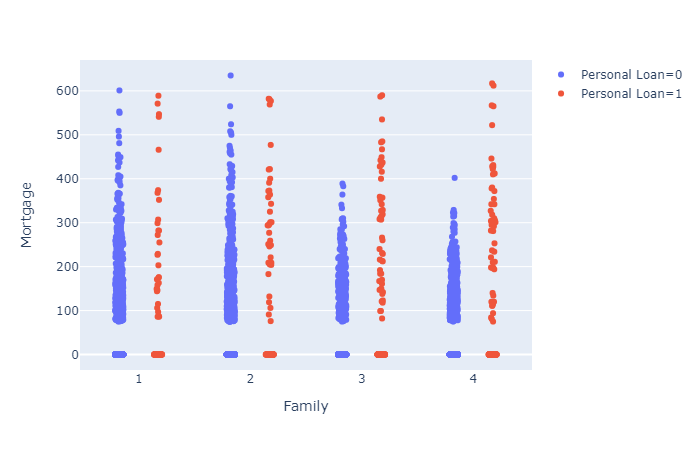

In [17]:
px.strip(data_frame=loans,x='Family',y='Mortgage',color='Personal Loan')

## Inference:
Mortgage and family size doesnt really explain much on personal loan

## <a id='4.6.'>4.6. Income and Mortgage in Personal Loan</a>

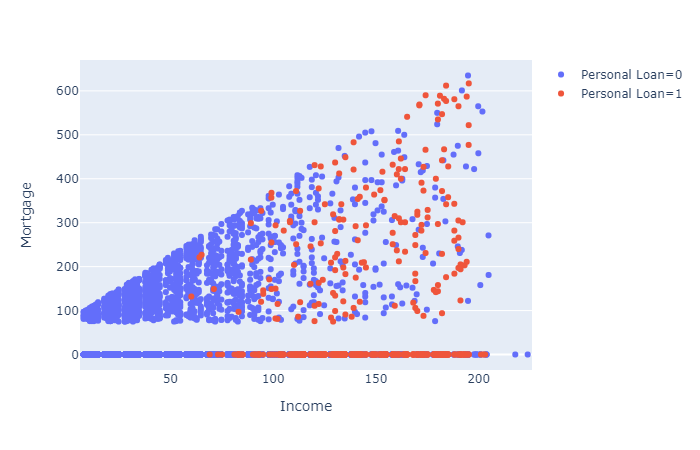

In [18]:
px.strip(data_frame=loans,x='Income',y='Mortgage',color='Personal Loan')

## Inference:

There seems to be a better cutoff of mortgage greater than 300 and income greater than 100, we can target these customers for loans campaign

## <a id='4.7.'>4.7. CCAvg and Family in Personal Loan</a>

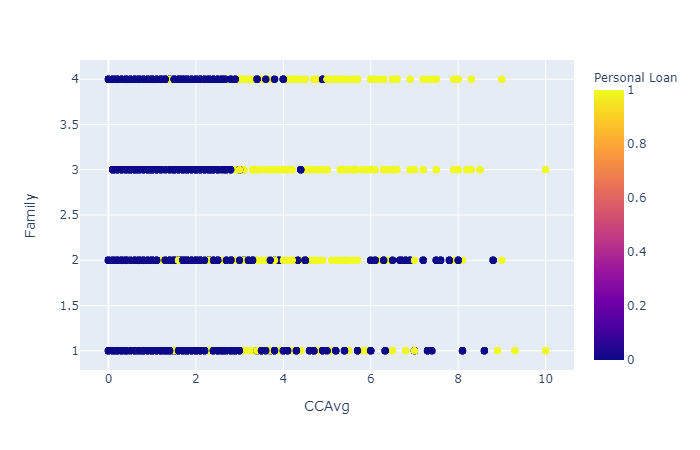

In [19]:
px.scatter(data_frame=loans_viz,x='CCAvg',y='Family',color='Personal Loan')

## Inference:
CCAVG > 3 there is higher chance of personal loan and there are better chances on family sizes 3 & 4.
They can be targetted for campain

## <a id='4.8.'>4.8. Distribution of Categorical Variables across Loan and Non Loan Cusotmers</a>

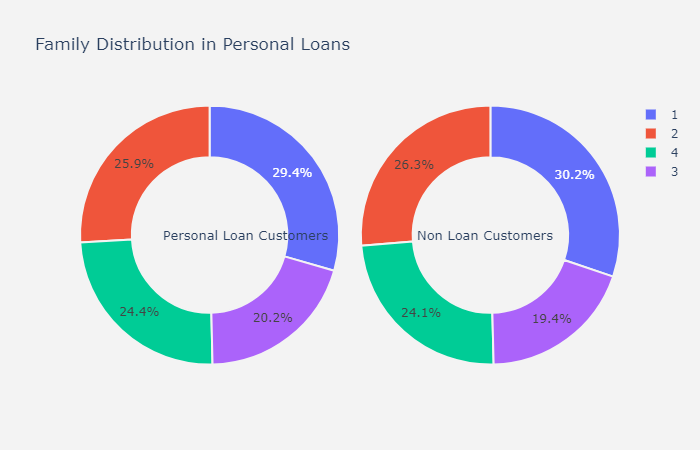

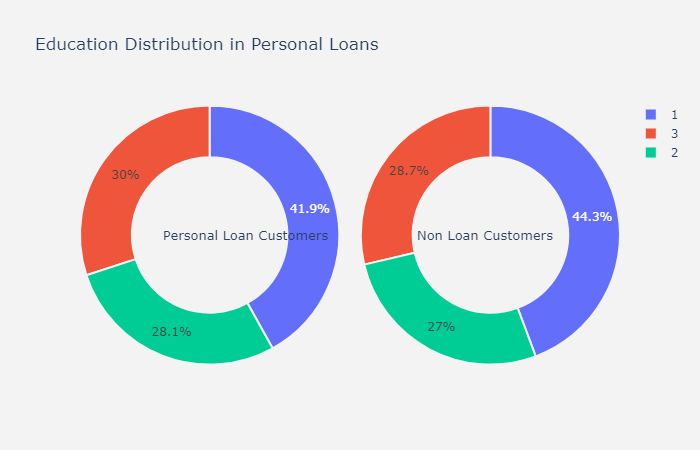

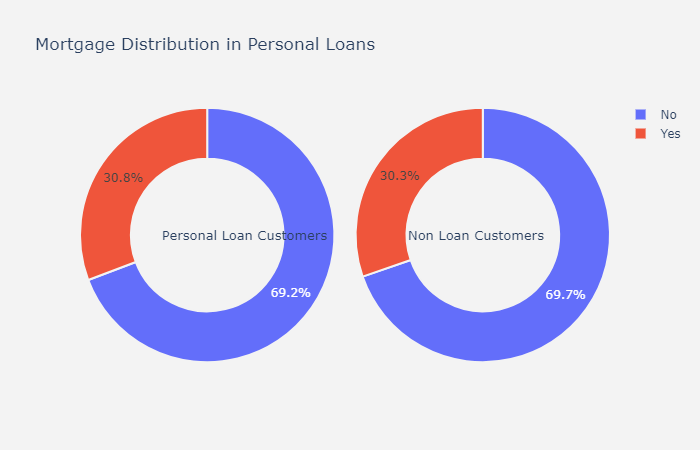

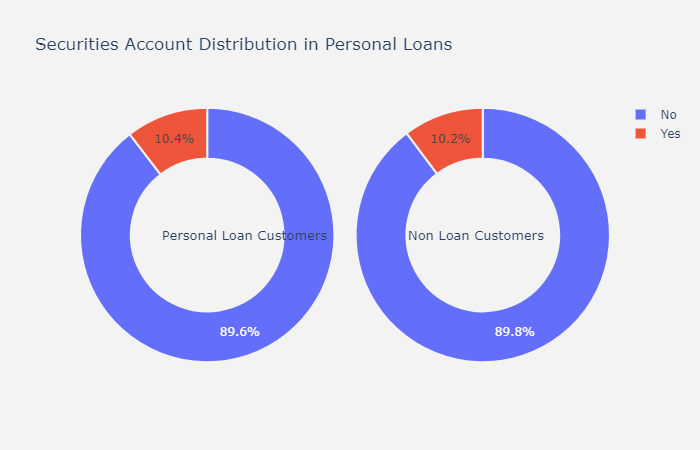

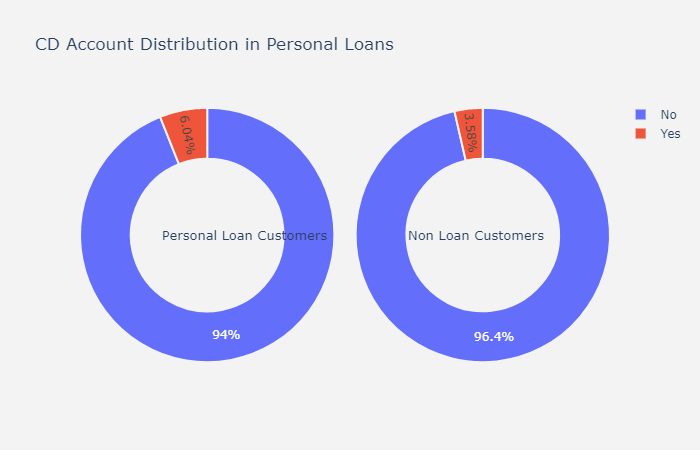

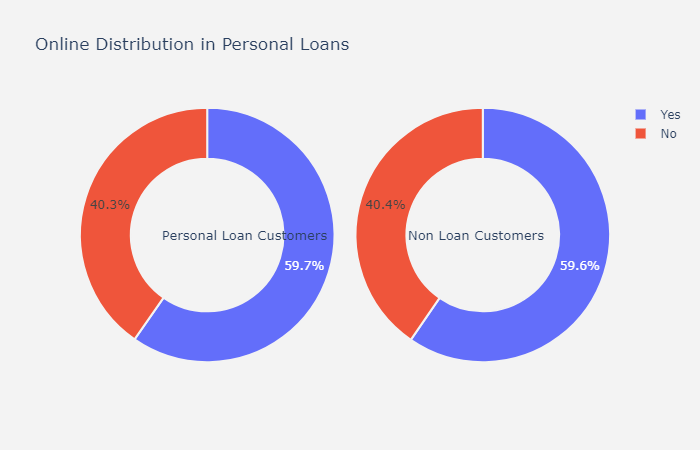

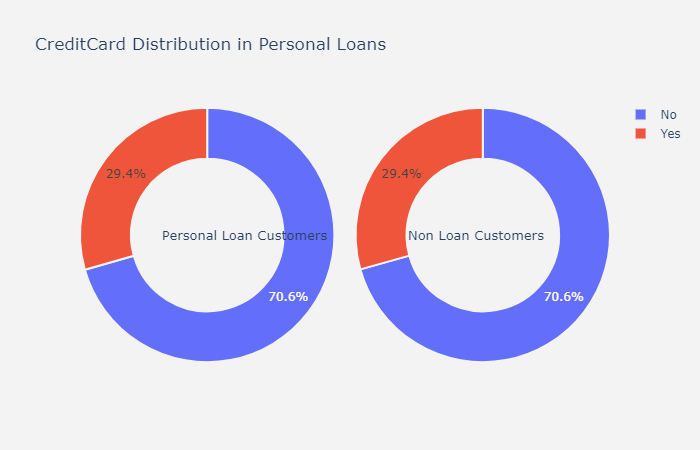

In [20]:
def plot_pie(column):

    trace1 = go.Pie(
        values=loans_viz[column].value_counts().values.tolist(),
        labels=loans_viz[column].value_counts().keys().tolist(),
        hoverinfo='label+percent+name',
        domain=dict(x=[0, .48]),
        name='Personal Loan Customers',
        marker=dict(line=dict(width=2, color='rgb(243,243,243)')),
        hole=.6,
        )
    trace2 = go.Pie(
        values=not_loan[column].value_counts().values.tolist(),
        labels=not_loan[column].value_counts().keys().tolist(),
        hoverinfo='label+percent+name',
        marker=dict(line=dict(width=2, color='rgb(243,243,243)')),
        domain=dict(x=[.52, 1]),
        hole=.6,
        name='Non Loan Customers',
        )

    layout = go.Layout(dict(title=column
                       + ' Distribution in Personal Loans ',
                       plot_bgcolor='rgb(243,243,243)',
                       paper_bgcolor='rgb(243,243,243)',
                       annotations=[dict(text='Personal Loan Customers'
                       , font=dict(size=13), showarrow=False, x=.15,
                       y=.5), dict(text='Non Loan Customers',
                       font=dict(size=13), showarrow=False, x=.88,
                       y=.5)]))

    data = [trace1, trace2]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)


    # for all categorical columns plot pie

for i in cat_cols:
    plot_pie(i)

## Inference:
all the distributions are identical except for CD Account

## <a id='4.9.'>4.9. Distribution of Numerical Features across Loan and Non Loan Cusotmers</a>

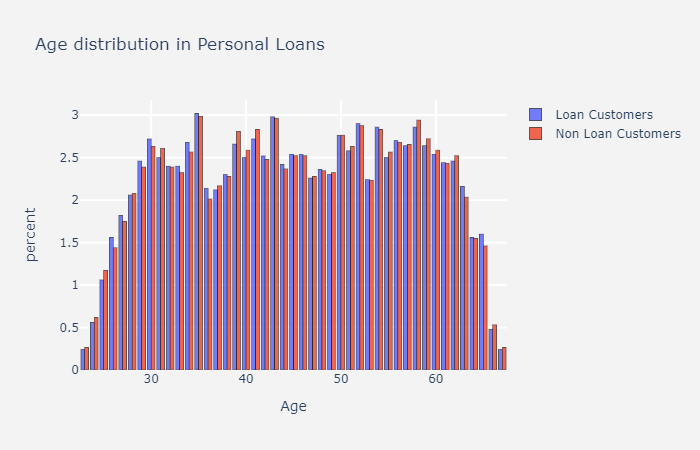

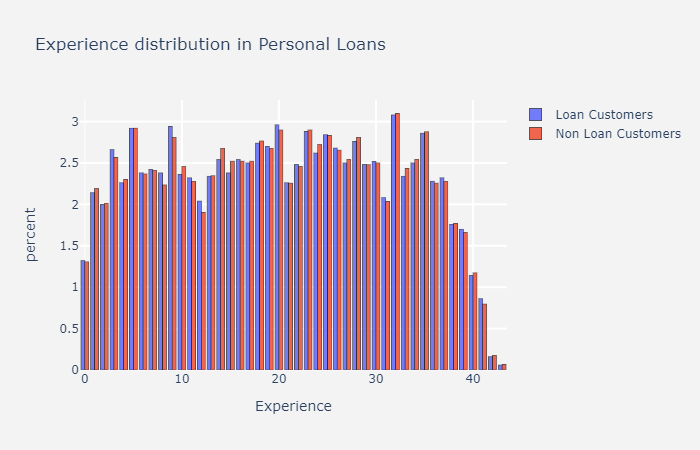

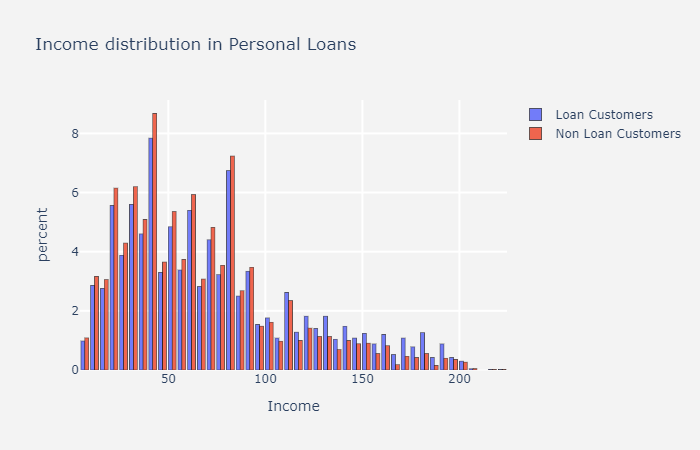

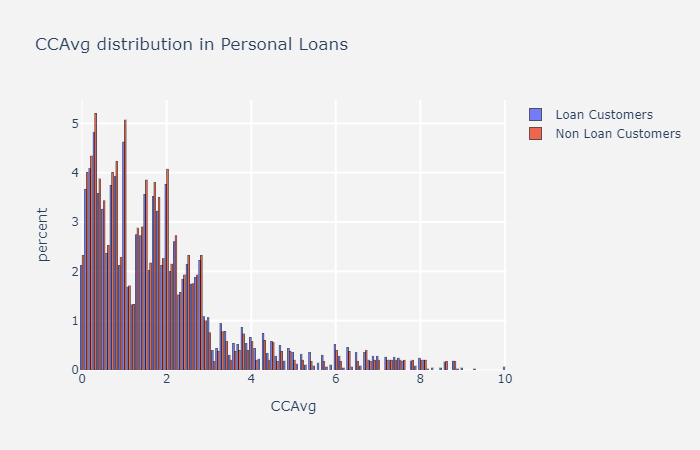

In [21]:
def histogram(column):
    trace1 = go.Histogram(x=loans[column], histnorm='percent',
                          name='Loan Customers',
                          marker=dict(line=dict(width=.5, color='black'
                          )), opacity=.9)

    trace2 = go.Histogram(x=not_loan[column], histnorm='percent',
                          name='Non Loan Customers',
                          marker=dict(line=dict(width=.5, color='black'
                          )), opacity=.9)
    data = [trace1, trace2]
    layout = go.Layout(dict(title=column
                       + ' distribution in Personal Loans ',
                       plot_bgcolor='rgb(243,243,243)',
                       paper_bgcolor='rgb(243,243,243)',
                       xaxis=dict(gridcolor='rgb(255, 255, 255)',
                       title=column, zerolinewidth=1, ticklen=5,
                       gridwidth=2),
                       yaxis=dict(gridcolor='rgb(255, 255, 255)',
                       title='percent', zerolinewidth=1, ticklen=5,
                       gridwidth=2)))
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)
for i in num_cols:
    histogram(i)

## Inference:
Data distribution of both the classes are similar across all numerical variables

# <a id='5'>5. Data Preprocessing</a>

## <a id='5.1.'>5.1. Data Split into Test and Train</a>

In [22]:
##Split the train and test with 30%ratio

(train, test) = train_test_split(loans, test_size=.3, random_state=111)

##seperating dependent and independent variables

cols = [i for i in loans.columns if i not in Id_col + target_col + exclude]
X_train = train[cols]
y_train = train[target_col].values.ravel()
X_test = test[cols]
y_test = test[target_col].values.ravel()

In [23]:
y_train

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

## <a id='5.2.'>5.2. Normalise the data</a>

In [24]:
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)

# <a id='6.'>6. Model Building</a>

## <a id='6.0.'>6.0. Functions to be used across all models</a>

In [25]:
def print_conf_matrix(conf_mat):
    import plotly.graph_objects as go
    fig = go.Figure(data=go.Heatmap(
        z=conf_mat,
        x=['Actual: Not Loan', ' Actual: Loan'],
        y=['Predict: Not Loan', 'Predict: Loan'],
        showscale=False,
        colorscale='Rainbow',
        name='matrix',
        xaxis='x2',
        yaxis='y2',
        ))
    fig.show()

## <a id='6.1.'>6.1. KNN Classifier</a>

## <a id='6.1.1.'>6.1.1.Finding best K value</a>

In [26]:
from sklearn.neighbors import KNeighborsClassifier
def knn_classifier(k):
    knn = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski', metric_params = None, n_jobs = 1, n_neighbors = k, p = 2, weights = 'uniform')
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    probabilities = knn.predict_proba(X_test)
    precision = precision_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    rs = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print('f1_score  for k ={}  is  {}'.format(k, f1))
#     print('Accuracy score for k ={}  is  {}'.format(k, accuracy))
for k in range(1, 20, 2):
    knn_classifier(k)

f1_score  for k =1  is  0.8
f1_score  for k =3  is  0.7772925764192139
f1_score  for k =5  is  0.7692307692307692
f1_score  for k =7  is  0.7671232876712328
f1_score  for k =9  is  0.7264150943396227
f1_score  for k =11  is  0.673170731707317
f1_score  for k =13  is  0.6633663366336634
f1_score  for k =15  is  0.6633663366336634
f1_score  for k =17  is  0.6363636363636365
f1_score  for k =19  is  0.6331658291457287


## Inference:
at k=5 we have better score and hence we will use this in our model

## <a id='6.1.2.'>6.1.2. KNN Model</a>

In [27]:
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski', metric_params = None, n_jobs = 1, n_neighbors = 5, p = 2, weights = 'uniform')
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1368
           1       0.96      0.64      0.77       132

    accuracy                           0.97      1500
   macro avg       0.96      0.82      0.88      1500
weighted avg       0.97      0.97      0.96      1500



## <a id='6.2.'>6.2. LogisticRegression Model</a>

In [28]:
## Logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=1,solver='liblinear')
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1368
           1       0.77      0.64      0.70       132

    accuracy                           0.95      1500
   macro avg       0.87      0.81      0.84      1500
weighted avg       0.95      0.95      0.95      1500



## <a id='6.3.'>6.3. GaussianNB Model</a>

In [29]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1368
           1       0.38      0.58      0.46       132

    accuracy                           0.88      1500
   macro avg       0.67      0.75      0.70      1500
weighted avg       0.91      0.88      0.89      1500



## <a id='6.4.'>6.4. DecisionTreeClassifier Model</a>

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=11)
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1368
           1       0.87      0.93      0.90       132

    accuracy                           0.98      1500
   macro avg       0.93      0.96      0.94      1500
weighted avg       0.98      0.98      0.98      1500



## <a id='6.5.'>6.5. RadiusNeighborsClassifier Model</a>

In [31]:
from sklearn.neighbors import RadiusNeighborsClassifier
rnc = RadiusNeighborsClassifier(radius=1.5,outlier_label =1)
rnc.fit(X_train, y_train)
predictions = rnc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1368
           1       0.65      0.69      0.67       132

    accuracy                           0.94      1500
   macro avg       0.81      0.83      0.82      1500
weighted avg       0.94      0.94      0.94      1500



# <a id='7.'>7. Model Performances </a>
## <a id='7.1'>7.1. Model Performance Metrics</a>

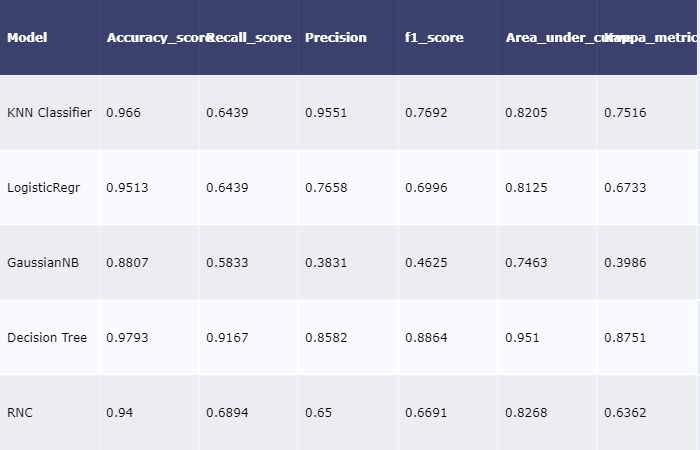

In [32]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#gives model report in dataframe
def model_report(model,name) :
    model.fit(X_train,y_train)
    predictions  = model.predict(X_test)
    accuracy     = accuracy_score(y_test,predictions)
    recallscore  = recall_score(y_test,predictions)
    precision    = precision_score(y_test,predictions)
    roc_auc      = roc_auc_score(y_test,predictions)
    f1score      = f1_score(y_test,predictions) 
    kappa_metric = cohen_kappa_score(y_test,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(knn,"KNN Classifier")
model2 = model_report(log_reg,"LogisticRegr")
model3 = model_report(gb,"GaussianNB")
model4 = model_report(dtc,"Decision Tree")
model5 = model_report(rnc,"RNC")
#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

## <a id='7.2'>7.2. Compare Model Metrics</a>

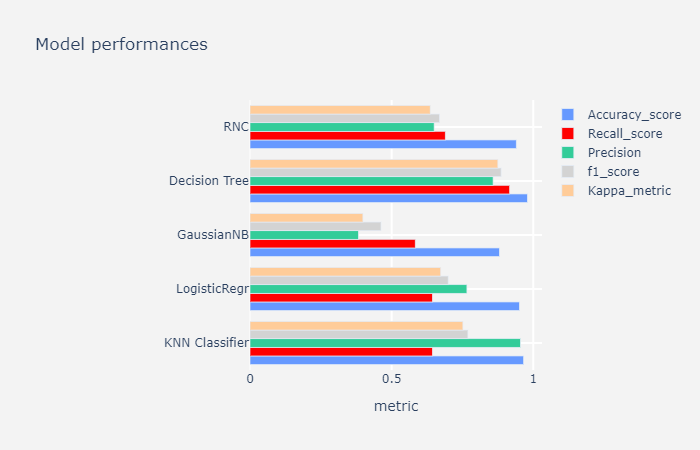

In [33]:
model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")
trace5  = output_tracer('Kappa_metric',"#FFCC99")

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)


## Inference:

Based on the above table, as we can chose the best model based on business scenario.

as a bank, if I have to chose between these models I would go with the one with best f1 score as data is imbalanced. 
### Decision Tree would be good choice followed by KNN

# <a id='8.'>8. Ensemble Methods </a>
## <a id='8.1'>8.1. Bagging Classifier</a>

In [34]:
from sklearn.ensemble import BaggingClassifier


## <a id='8.1.1.'>8.1.1. KNeighborsClassifier</a>

In [35]:
k_bgc = BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=25,max_samples=.7,oob_score=True,random_state=1)
k_bgc.fit(X_train,y_train)
predictions=k_bgc.predict(X_test)
print(f1_score(y_test,predictions))
print(classification_report(y_test, predictions))

0.75
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1368
           1       0.96      0.61      0.75       132

    accuracy                           0.96      1500
   macro avg       0.96      0.81      0.87      1500
weighted avg       0.96      0.96      0.96      1500



## <a id='8.1.2.'>8.1.2. LogisticRegression</a>

In [36]:
lr_bgc = BaggingClassifier(base_estimator=LogisticRegression(random_state=1,solver='liblinear'),n_estimators=25,max_samples=.7,oob_score=True,random_state=1)
lr_bgc.fit(X_train,y_train)
predictions=lr_bgc.predict(X_test)
print(f1_score(y_test,predictions))
print(classification_report(y_test, predictions))

0.6995884773662552
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1368
           1       0.77      0.64      0.70       132

    accuracy                           0.95      1500
   macro avg       0.87      0.81      0.84      1500
weighted avg       0.95      0.95      0.95      1500



## <a id='8.1.3.'>8.1.3. GaussianNB</a>

In [37]:
gb_bgc = BaggingClassifier(base_estimator=GaussianNB(),n_estimators=25,max_samples=.7,oob_score=True,random_state=1)
gb_bgc.fit(X_train,y_train)
predictions=gb_bgc.predict(X_test)
print(f1_score(y_test,predictions))
print(classification_report(y_test, predictions))

0.46200607902735563
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1368
           1       0.39      0.58      0.46       132

    accuracy                           0.88      1500
   macro avg       0.67      0.74      0.70      1500
weighted avg       0.91      0.88      0.89      1500



## <a id='8.1.4.'>8.1.4. DecisionTreeClassifier</a>

In [38]:
dt_bgc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=25,max_samples=.7,oob_score=True,random_state=1)
dt_bgc.fit(X_train,y_train)
predictions=dt_bgc.predict(X_test)
print(f1_score(y_test,predictions))
print(classification_report(y_test, predictions))

0.9090909090909091
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1368
           1       0.91      0.91      0.91       132

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



## <a id='8.2'>8.2. Boosting Methods</a>
## <a id='8.2.1.'>8.2.1. AdaBoostClassifier</a>

In [39]:
from sklearn.ensemble import AdaBoostClassifier

KNeighborsClassifier doesn't support sample_weight, hence cannot be used with adaboost

## <a id='8.2.1.1.'>8.2.1.1. LogisticRegression</a>

In [40]:
lr_abc = AdaBoostClassifier(base_estimator=LogisticRegression(random_state=1,solver='liblinear'),random_state=1,learning_rate=.5,n_estimators=75)
lr_abc.fit(X_train,y_train)
predictions = lr_abc.predict(X_test)
print(f1_score(y_test,predictions))
print(classification_report(y_test, predictions))

0.6586345381526104
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1368
           1       0.70      0.62      0.66       132

    accuracy                           0.94      1500
   macro avg       0.83      0.80      0.81      1500
weighted avg       0.94      0.94      0.94      1500



## <a id='8.2.1.2.'>8.2.1.2. GaussianNB</a>

In [41]:
gb_abc = AdaBoostClassifier(base_estimator=GaussianNB(),random_state=1,learning_rate=.5,n_estimators=75)
gb_abc.fit(X_train,y_train)
predictions = gb_abc.predict(X_test)
print(f1_score(y_test,predictions))
print(classification_report(y_test, predictions))

0.33695652173913043
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      1368
           1       0.22      0.70      0.34       132

    accuracy                           0.76      1500
   macro avg       0.59      0.73      0.59      1500
weighted avg       0.90      0.76      0.81      1500



## <a id='8.2.1.3.'>8.2.1.3. DecisionTreeClassifier</a>

In [42]:
dtc_abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=1,learning_rate=.5,n_estimators=75)
dtc_abc.fit(X_train,y_train)
predictions = dtc_abc.predict(X_test)
print(f1_score(y_test,predictions))
print(classification_report(y_test, predictions))

0.8683274021352313
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1368
           1       0.82      0.92      0.87       132

    accuracy                           0.98      1500
   macro avg       0.91      0.95      0.93      1500
weighted avg       0.98      0.98      0.98      1500



## <a id='8.2.1.4.'>8.2.1.4. default AdaBoostClassifier</a>

In [43]:
abc = AdaBoostClassifier(random_state=1,learning_rate=.5,n_estimators=75)
abc.fit(X_train,y_train)
predictions = abc.predict(X_test)
print(f1_score(y_test,predictions))
print(classification_report(y_test, predictions))

0.7843137254901961
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1368
           1       0.81      0.76      0.78       132

    accuracy                           0.96      1500
   macro avg       0.89      0.87      0.88      1500
weighted avg       0.96      0.96      0.96      1500



## <a id='8.2.2.'>8.2.2. GradientBoostingClassifier</a>

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
gbc = GradientBoostingClassifier(n_estimators=50,random_state=50)
gbc.fit(X_train,y_train)
predictions = gbc.predict(X_test)
print(f1_score(y_test,predictions))
print(classification_report(y_test, predictions))

0.9213483146067416
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1368
           1       0.91      0.93      0.92       132

    accuracy                           0.99      1500
   macro avg       0.95      0.96      0.96      1500
weighted avg       0.99      0.99      0.99      1500



## <a id='8.3'>8.3. VotingClassifier</a>

In [46]:
from sklearn.ensemble import VotingClassifier

In [47]:
clf1= GradientBoostingClassifier(n_estimators=50,random_state=50)
clf2=AdaBoostClassifier(base_estimator=dtc,random_state=1,learning_rate=.5,n_estimators=75)
clf3=LogisticRegression(random_state=1,solver='liblinear')
clf4=DecisionTreeClassifier(max_depth=11)
clf5=RadiusNeighborsClassifier(radius=1.5,outlier_label =1)

vc = VotingClassifier(estimators=[  ('log_reg', clf3), ('dtc', clf4), ('rnvc', clf5),('gb',clf1),('adab',clf2)],voting='hard')
vc.fit(X_train,y_train)
predictions= vc.predict(X_test)
print(f1_score(y_test,predictions))
print(classification_report(y_test, predictions))

0.9132075471698113
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1368
           1       0.91      0.92      0.91       132

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



## <a id='8.4'>8.4. RandomForestClassifier</a>

In [48]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators =75,random_state=1)
rc.fit(X_train,y_train)
predictions = rc.predict(X_test)
print(f1_score(y_test,predictions))
print(classification_report(y_test, predictions))

0.9384615384615383
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1368
           1       0.95      0.92      0.94       132

    accuracy                           0.99      1500
   macro avg       0.97      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500



## <a id='8.5'>8.5. lightgbm</a>

In [49]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train)

In [50]:
params = {
 'task': 'train'
 , 'boosting_type': 'gbdt'
 , 'objective':  'multiclass'
 , 'num_class': 2
 , 'metric':  'multi_logloss'
 , 'min_data': 1
 , 'verbose': -1
}
 
gbm = lgb.train(params, lgb_train, num_boost_round=50)

In [51]:
predictions = gbm.predict(X_test)
predictions_classes = []
for i in predictions:
  predictions_classes.append(np.argmax(i))
predictions_classes = np.array(predictions_classes)
print(classification_report(predictions_classes, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1362
           1       0.92      0.88      0.90       138

    accuracy                           0.98      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



## <a id='8.6'>8.6. xgboost</a>

In [52]:
import xgboost  as xgb

In [53]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)


param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations



model = xgb.train(param, D_train, steps)



preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

# print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
# print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
# print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
# print("f1 = {}".format(f1_score(y_test, best_preds)))
print(classification_report(y_test,best_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1368
           1       0.90      0.92      0.91       132

    accuracy                           0.98      1500
   macro avg       0.94      0.96      0.95      1500
weighted avg       0.98      0.98      0.98      1500



## <a id='9.'>9. Ensemble Performances </a>
## <a id='9.1'>9.1. Ensemble Performance Metrics</a>


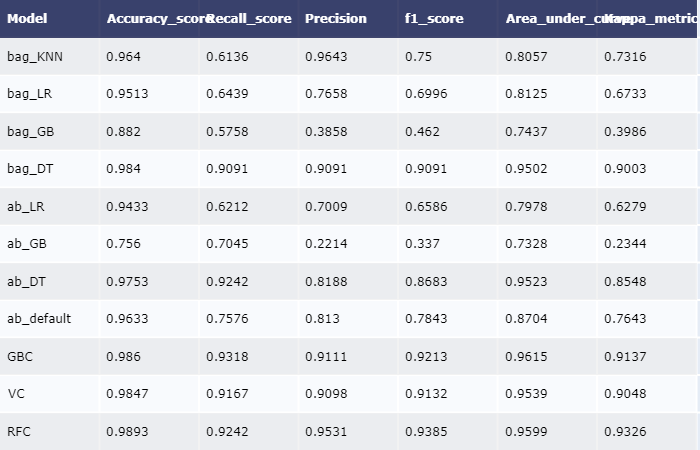

In [54]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#gives model report in dataframe
def model_report(model,name) :
    model.fit(X_train,y_train)
    predictions  = model.predict(X_test)
    accuracy     = accuracy_score(y_test,predictions)
    recallscore  = recall_score(y_test,predictions)
    precision    = precision_score(y_test,predictions)
    roc_auc      = roc_auc_score(y_test,predictions)
    f1score      = f1_score(y_test,predictions) 
    kappa_metric = cohen_kappa_score(y_test,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(k_bgc,"bag_KNN")
model2 = model_report(lr_bgc,"bag_LR")
model3 = model_report(gb_bgc,"bag_GB")
model4 = model_report(dt_bgc,"bag_DT")
model5 = model_report(lr_abc,"ab_LR")
model6 = model_report(gb_abc,"ab_GB")
model7 = model_report(dtc_abc,"ab_DT")
model8 = model_report(abc,"ab_default")
model9 = model_report(gbc,"GBC")
model10 = model_report(vc,"VC")
model11 = model_report(rc,"RFC")
# model12 = model_report(gbm,"LGB")
# model13 = model_report(model,"XGB")
#concat all models
ens_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,
								model7,model8,model9,
								model10,model11],axis = 0).reset_index()

ens_performances = ens_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(ens_performances,4))

py.iplot(table)

## <a id ='9.2'>9.2. Compare Ensemble Metrics</a>

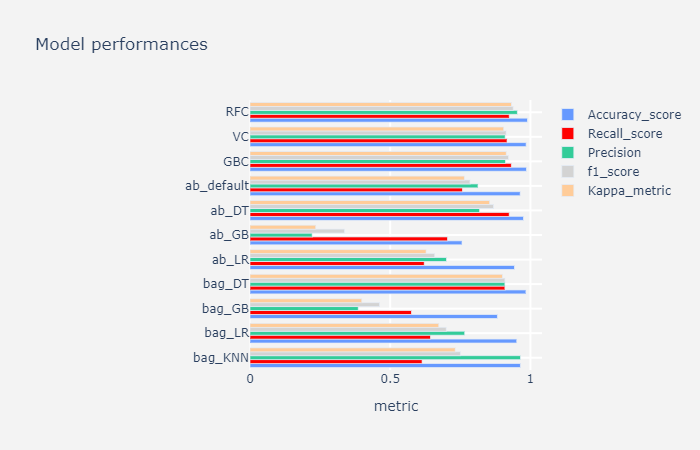

In [55]:
model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = ens_performances["Model"] ,
                    x = ens_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")
trace5  = output_tracer('Kappa_metric',"#FFCC99")

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)
